In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [53]:
main_df = pd.read_csv('../data/World Energy Consumption.csv')
main_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [54]:
countries = ['New Zealand']
filtered_df = main_df[main_df['country'].isin(countries)]
filtered_df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
13298,New Zealand,1900,NZL,809099.0,5.528757e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13299,New Zealand,1901,NZL,828174.0,5.546344e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13300,New Zealand,1902,NZL,848778.0,5.970456e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13301,New Zealand,1903,NZL,870968.0,6.532845e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13302,New Zealand,1904,NZL,893740.0,6.505505e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13416,New Zealand,2018,NZL,4838528.0,1.710136e+11,30.096,0.008,6.973,0.034,88.870,...,0.230,0.103,-1.104,-0.094,5.471,423.683,2.05,1130.772,4.720,2.117
13417,New Zealand,2019,NZL,4959033.0,NaN,40.398,0.014,9.552,0.047,96.793,...,0.297,0.128,9.077,0.475,5.946,449.684,2.23,1198.999,5.090,2.251
13418,New Zealand,2020,NZL,5061130.0,NaN,80.401,0.038,16.884,0.085,92.865,...,0.370,0.176,2.199,0.108,6.054,450.492,2.28,1196.234,5.279,2.525
13419,New Zealand,2021,NZL,5129730.0,NaN,-21.972,-0.019,12.998,0.067,91.623,...,0.461,0.231,14.638,0.861,6.915,510.748,2.62,1348.051,6.034,2.937


In [55]:
columns_needed = ['country', 'year', 'primary_energy_consumption', 'renewables_consumption', 'gdp', 'population']
data_selected = filtered_df[columns_needed]

# Check for missing values in the selected columns
data_selected.isnull().sum()

country                        0
year                           0
primary_energy_consumption    65
renewables_consumption        65
gdp                            4
population                     0
dtype: int64

In [56]:
# Drop rows with missing values
data_selected = data_selected.dropna()
data_selected.isnull().sum()

country                       0
year                          0
primary_energy_consumption    0
renewables_consumption        0
gdp                           0
population                    0
dtype: int64

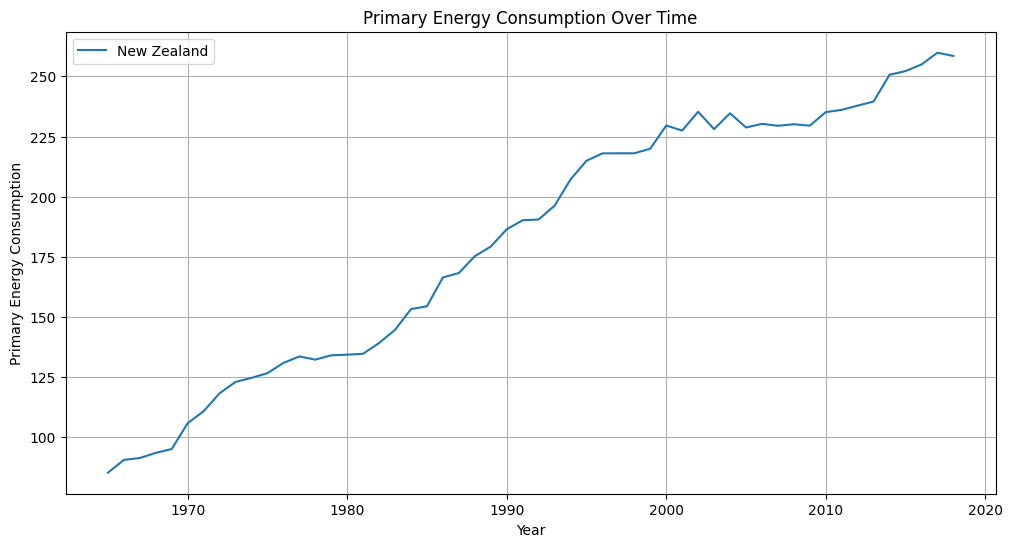

In [57]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = data_selected[data_selected['country'] == country]
    plt.plot(country_data['year'], country_data['primary_energy_consumption'], label=country)

plt.title('Primary Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

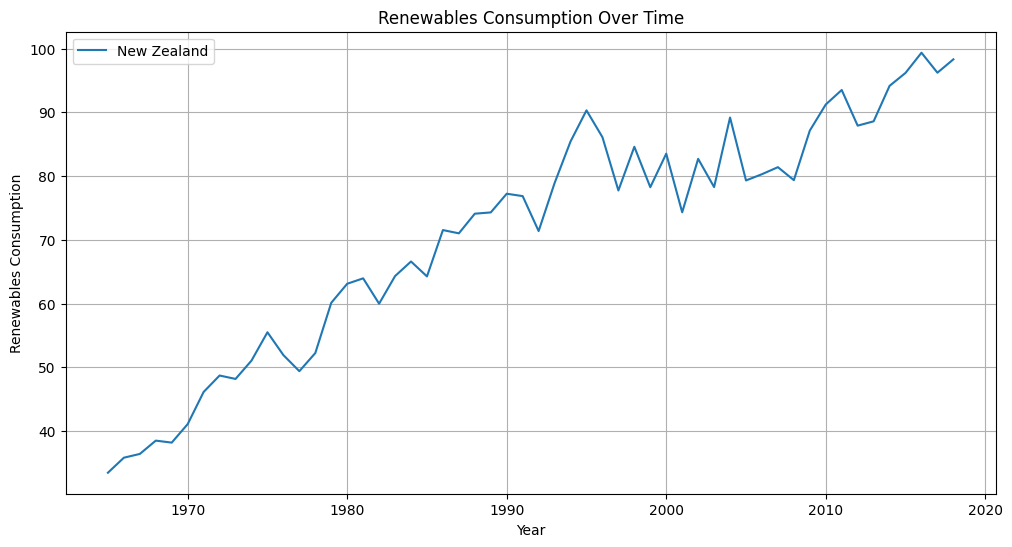

In [58]:
plt.figure(figsize=(12, 6))
for country in countries:
    subset = data_selected[data_selected['country'] == country]
    plt.plot(subset['year'], subset['renewables_consumption'], label=country)

plt.title('Renewables Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Renewables Consumption')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Forcasting the next 5 years
def forecast_energy_consumption(country, target_column, years_to_forecast=6):
    country_data = data_selected[data_selected['country'] == country]
    country_data = country_data.set_index('year')
    serise = country_data[target_column]
    exog_vars = country_data[['gdp', 'population']] 

    print(exog_vars)
    model = SARIMAX(serise, exog=exog_vars, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)

    last_exog = exog_vars.iloc[-1]
    future_exog = pd.DataFrame([last_exog] * years_to_forecast, columns=exog_vars.columns)
    
    forecast = model_fit.forecast(steps=years_to_forecast, exog=future_exog)
    forecast_years = np.arange(country_data.index[-1] + 1, country_data.index[-1] + years_to_forecast + 1)

    plt.figure(figsize=(12, 6))
    plt.plot(serise.index, serise.values, label='Actual Data')
    plt.plot(forecast_years, forecast.values, label='Forecast', color='red')
    plt.title(f'{country} {target_column} Forecast')
    plt.xlabel('Year')
    plt.ylabel('Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()

    return forecast

In [60]:
# Check the acuracy of the model
def check_accuracy(country, target_column):
    country_data = data_selected[data_selected['country'] == country].set_index('year')
    series = country_data[target_column]
    exog_vars = country_data[['gdp', 'population']]

    train_size = int(len(series) * 0.8)
    train, test = series[:train_size], series[train_size:]
    exog_train, exog_test = exog_vars.iloc[:train_size], exog_vars.iloc[train_size:]

    model = SARIMAX(train, exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)

    predictions = model_fit.forecast(steps=len(test), exog=exog_test)

    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)

    print(f'\nAccuracy for {country} {target_column}:')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Root Mean Squared Error: {rmse:.2f}')

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train.values, label='Train Data')
    plt.plot(test.index, test.values, label='Test Data', color='green')
    plt.plot(test.index, predictions.values, label='Predictions', color='red')
    plt.title(f'{country} {target_column} Model Accuracy with Exogenous Variables')
    plt.xlabel('Year')
    plt.ylabel('Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()


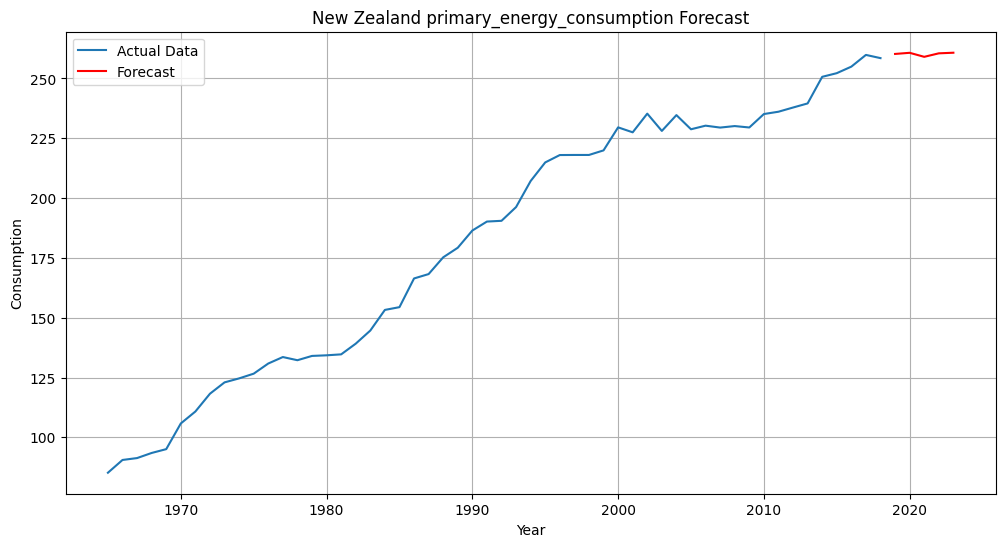


Accuracy for New Zealand primary_energy_consumption:
Mean Absolute Error: 5.61
Mean Squared Error: 53.47
Root Mean Squared Error: 7.31


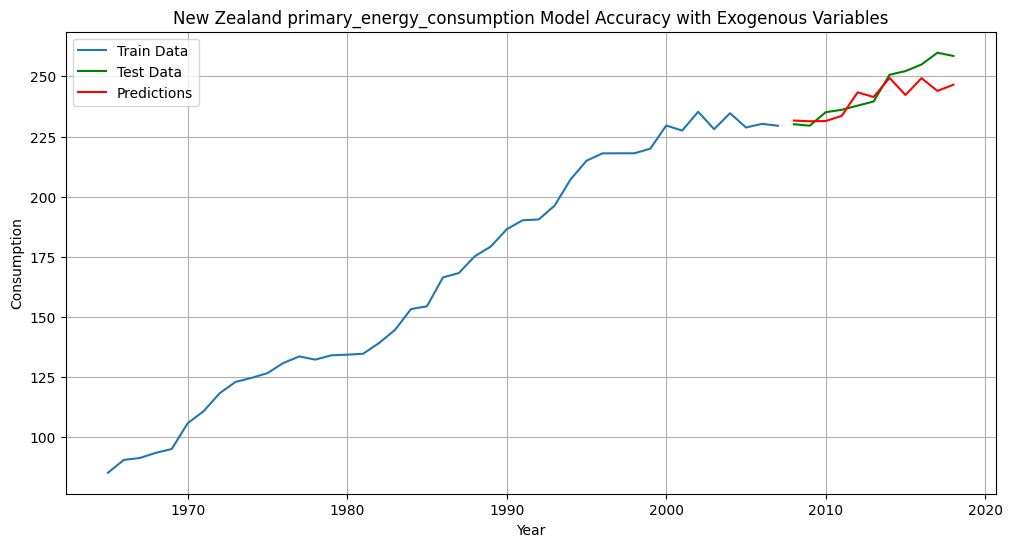

In [61]:
country = 'New Zealand'
target_column = 'primary_energy_consumption'
years_to_forecast = 5
forecast_energy_consumption(country, target_column, years_to_forecast)
check_accuracy(country, target_column)   


               gdp  population
year                          
1965  4.578718e+10   2638319.0
1966  4.867422e+10   2684362.0
1967  4.645221e+10   2725199.0
1968  4.637603e+10   2756420.0
1969  5.116340e+10   2786359.0
1970  5.043827e+10   2824068.0
1971  5.305504e+10   2868891.0
1972  5.532777e+10   2920886.0
1973  5.925951e+10   2980643.0
1974  6.278589e+10   3042806.0
1975  6.206604e+10   3095434.0
1976  6.357872e+10   3127819.0
1977  6.048124e+10   3141172.0
1978  6.072637e+10   3143303.0
1979  6.196189e+10   3142535.0
1980  6.239172e+10   3147166.0
1981  6.541959e+10   3160621.0
1982  6.664015e+10   3185723.0
1983  6.846687e+10   3219831.0
1984  7.184033e+10   3250341.0
1985  7.239672e+10   3268360.0
1986  7.391628e+10   3281673.0
1987  7.421999e+10   3299449.0
1988  7.401594e+10   3316005.0
1989  7.467744e+10   3333753.0
1990  7.448324e+10   3397388.0
1991  7.298997e+10   3481606.0
1992  7.369916e+10   3532568.0
1993  7.745208e+10   3573739.0
1994  8.275361e+10   3620893.0
1995  8.

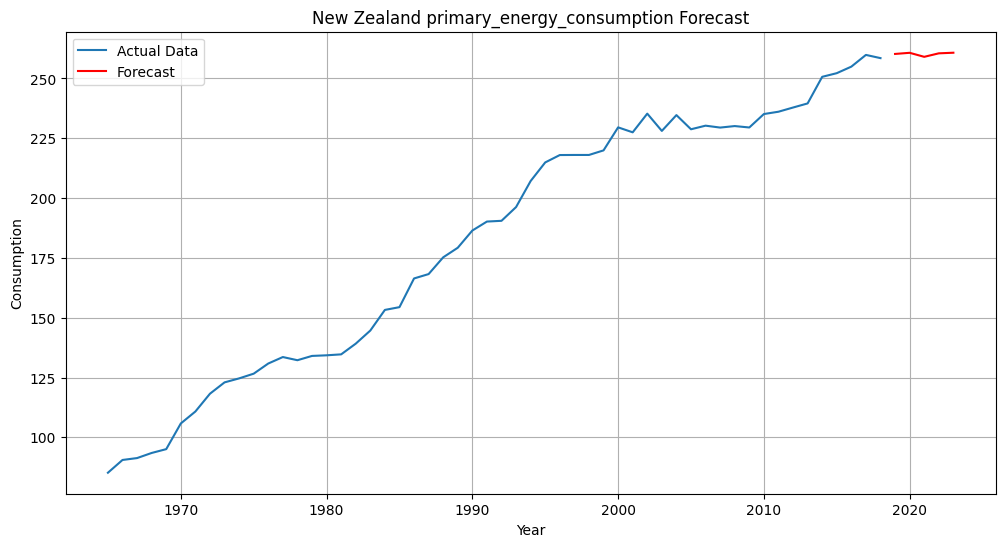

               gdp  population
year                          
1965  4.578718e+10   2638319.0
1966  4.867422e+10   2684362.0
1967  4.645221e+10   2725199.0
1968  4.637603e+10   2756420.0
1969  5.116340e+10   2786359.0
1970  5.043827e+10   2824068.0
1971  5.305504e+10   2868891.0
1972  5.532777e+10   2920886.0
1973  5.925951e+10   2980643.0
1974  6.278589e+10   3042806.0
1975  6.206604e+10   3095434.0
1976  6.357872e+10   3127819.0
1977  6.048124e+10   3141172.0
1978  6.072637e+10   3143303.0
1979  6.196189e+10   3142535.0
1980  6.239172e+10   3147166.0
1981  6.541959e+10   3160621.0
1982  6.664015e+10   3185723.0
1983  6.846687e+10   3219831.0
1984  7.184033e+10   3250341.0
1985  7.239672e+10   3268360.0
1986  7.391628e+10   3281673.0
1987  7.421999e+10   3299449.0
1988  7.401594e+10   3316005.0
1989  7.467744e+10   3333753.0
1990  7.448324e+10   3397388.0
1991  7.298997e+10   3481606.0
1992  7.369916e+10   3532568.0
1993  7.745208e+10   3573739.0
1994  8.275361e+10   3620893.0
1995  8.

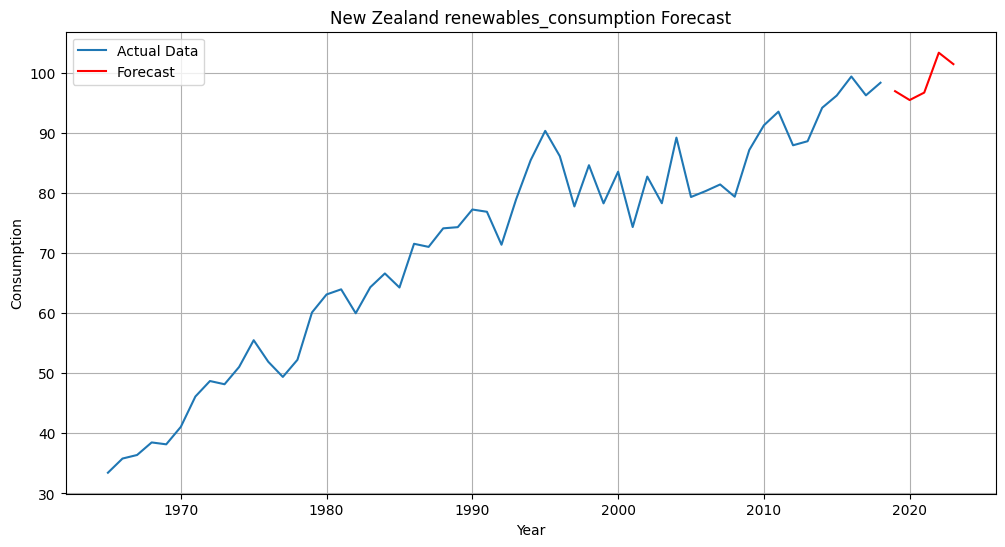

In [66]:
forecast_results = {}
for country in countries:
    forecast_total = forecast_energy_consumption(country, 'primary_energy_consumption', years_to_forecast=5)
    forecast_renewable = forecast_energy_consumption(country, 'renewables_consumption', years_to_forecast=5)

    forecast_results[country] = {
        'total_energy_forecast': forecast_total,
        'renewable_energy_forecast': forecast_renewable
    }

In [63]:
forecast_results

{'New Zealand': {'total_energy_forecast': 54    260.241593
  55    260.715586
  56    259.035212
  57    260.495390
  58    260.750807
  Name: predicted_mean, dtype: float64,
  'renewable_energy_forecast': 54     96.918633
  55     95.443516
  56     96.680966
  57    103.314812
  58    101.416510
  Name: predicted_mean, dtype: float64}}

In [64]:
summary = []
for country in countries:
    total_forecast = forecast_results[country]['total_energy_forecast']
    renewables_forecast = forecast_results[country]['renewable_energy_forecast']
    summary.append({
        'Country': country,
        '2030 Total Energy (TWh)': total_forecast.iloc[-1],
        '2030 Renewables (TWh)': renewables_forecast.iloc[-1],
        'Renewables Share (%)': (renewables_forecast.iloc[-1] / total_forecast.iloc[-1]) * 100
    })

summary_df = pd.DataFrame(summary)
print("\nProjected Energy Consumption in 2030:")
print(summary_df)


Projected Energy Consumption in 2030:
       Country  2030 Total Energy (TWh)  2030 Renewables (TWh)  \
0  New Zealand               260.750807              101.41651   

   Renewables Share (%)  
0             38.894035  
